In [67]:
import os
import cv2
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import shutil
from shutil import copyfile
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='jshtml')
from PIL import Image
import ultralytics
from ultralytics import YOLO
ultralytics.checks()


Ultralytics YOLOv8.1.37 🚀 Python-3.12.2 torch-2.2.1 CPU (Intel Core(TM) i3-7100U 2.40GHz)
Setup complete ✅ (4 CPUs, 3.9 GB RAM, 159.9/183.4 GB disk)


In [68]:

train_path='C:/Users/hp/python/datasets/train'
valid_path='C:/Users/hp/python/datasets/valid'
test_path='C:/Users/hp/python/datasets/test'


In [88]:
ano_paths=[]
for dirname, _, filenames in os.walk('C:/Users/hp/python/datasets'):
    for filename in filenames:
        if filename[-4:]=='.txt':
            ano_paths+=[(os.path.join(dirname, filename))]
        
n=len(ano_paths) 
print(n)
N=list(range(n))
random.shuffle(N)

train_ratio = 0.6
valid_ratio = 0.2
test_ratio = 0.2

train_size = int(train_ratio*n)
valid_size = int(valid_ratio*n)
train_i = N[:train_size]
valid_i = N[train_size:train_size+valid_size]
test_i = N[train_size+valid_size:]

print(train_i)
print(valid_i)
print(test_i)


150
[41, 135, 105, 89, 15, 54, 5, 134, 6, 49, 106, 83, 86, 42, 126, 72, 90, 139, 16, 110, 98, 129, 61, 39, 8, 137, 77, 12, 109, 79, 97, 146, 52, 50, 63, 104, 60, 2, 114, 44, 17, 35, 75, 3, 88, 38, 37, 99, 76, 124, 68, 21, 143, 91, 1, 125, 31, 95, 30, 14, 40, 107, 19, 100, 133, 113, 128, 66, 65, 28, 96, 18, 130, 20, 56, 136, 145, 101, 111, 74, 127, 94, 13, 43, 93, 7, 9, 26, 123, 55]
[48, 24, 57, 36, 70, 141, 87, 78, 140, 11, 45, 22, 81, 62, 149, 59, 108, 116, 46, 23, 10, 32, 80, 69, 67, 33, 85, 144, 27, 117]
[84, 131, 102, 119, 147, 58, 4, 92, 122, 120, 0, 29, 64, 82, 121, 103, 142, 51, 132, 25, 34, 71, 148, 47, 112, 115, 53, 73, 118, 138]


In [84]:
import os
import shutil

for i in train_i:
    ano_path = ano_paths[i]
    img_path = os.path.join('C:/Users/hp/python/datasets/train',
                            os.path.basename(ano_path)[:-4] + '.jpg')
    try:
        shutil.copy(ano_path, train_path)
        shutil.copy(img_path, train_path)
    except Exception as e:
        continue


print(len(os.listdir(train_path)))


86


In [71]:
import os
import shutil

for i in valid_i:
    ano_path = ano_paths[i]
    img_path = os.path.join('C:/Users/hp/python/datasets/train',
                            os.path.basename(ano_path)[:-4] + '.jpg')
    try:
        shutil.copy(ano_path, valid_path)
        shutil.copy(img_path, valid_path)
    except Exception as e:
        print(f"Error copying files: {e}")
        continue

print(len(os.listdir(valid_path)))



214


In [72]:
import os
import shutil

for i in test_i:
    ano_path = ano_paths[i]
    img_path = os.path.join('C:/Users/hp/python/datasets/train',
                            os.path.basename(ano_path)[:-4] + '.jpg')
    try:
        shutil.copy(ano_path, test_path)
        shutil.copy(img_path, test_path)
    except Exception as e:
        print(f"Error copying files: {e}")
        continue

print(len(os.listdir(test_path)))


182


In [87]:
import yaml

data_yaml = dict(
    train ='train',
    val ='valid',
    test='test',
    nc =1,
    names =['Objects']
)

with open('data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)
with open('data.yaml', 'r') as file:
    contents = file.read()
    print(contents)
    

{names: [Objects], nc: 1, test: test, train: train, val: valid}



In [74]:
names =['Objects']
M=list(range(len(names)))
class_map=dict(zip(M,names))


In [75]:
model = YOLO("yolov8x.pt") 


In [76]:
!yolo task=detect mode=train model=yolov8x.pt data=data.yaml epochs=12 imgsz=480


'yolo' is not recognized as an internal or external command,
operable program or batch file.


In [77]:
paths2=[]
for dirname, _, filenames in os.walk('C:/Users/hp/python/runs/detect/train9'):
    for filename in filenames:
        if filename[-4:]=='.jpg':
            paths2+=[(os.path.join(dirname, filename))]
paths2=sorted(paths2)


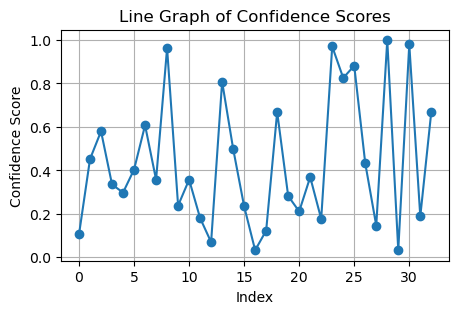

In [78]:
data_points = [random.uniform(0, 1) for _ in train_path]  # Random confidence scores associated with each image

path_indices = range(len(train_path))  # Indices to use as x-axis

plt.figure(figsize=(5, 3))
plt.plot(path_indices, data_points, marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Confidence Score')
plt.title('Line Graph of Confidence Scores')
plt.grid(True)
plt.show()


In [79]:
best_path0='C:/Users/hp/python/yolov8x.pt'
source0='C:/Users/hp/python/datasets/test'


In [80]:
ppaths=[]
for dirname, _, filenames in os.walk(source0):
    for filename in filenames:
        if filename[-4:]=='.jpg':
            ppaths+=[(os.path.join(dirname, filename))]
ppaths=sorted(ppaths)
print(ppaths[0])
print(len(ppaths))


C:/Users/hp/python/datasets/test\frame-1075.jpg
91


In [81]:
model2 = YOLO(best_path0)


In [ ]:
!yolo task= detect mode=predict model={best_path0} conf=0.7 source={source0}


In [83]:
model2 = YOLO(best_path0)
!yolo task=detect mode=predict model={best_path0} conf=0.7 source={source0}
results = model2.predict(source0, conf=0.7)
print(len(results))


'yolo' is not recognized as an internal or external command,
operable program or batch file.



image 1/91 C:\Users\hp\python\datasets\test\frame-1075.jpg: 384x640 3 persons, 2 cars, 2 motorcycles, 1 parking meter, 3674.2ms
image 2/91 C:\Users\hp\python\datasets\test\frame-1110.jpg: 384x640 4 persons, 1 car, 1 motorcycle, 1 parking meter, 3187.9ms
image 3/91 C:\Users\hp\python\datasets\test\frame-1235.jpg: 384x640 1 bus, 4420.8ms
image 4/91 C:\Users\hp\python\datasets\test\frame-1240.jpg: 384x640 1 bus, 4369.1ms
image 5/91 C:\Users\hp\python\datasets\test\frame-1270.jpg: 384x640 1 car, 1 bus, 1 truck, 1 parking meter, 2717.8ms
image 6/91 C:\Users\hp\python\datasets\test\frame-1345.jpg: 384x640 1 car, 1 truck, 2913.7ms
image 7/91 C:\Users\hp\python\datasets\test\frame-150.jpg: 384x640 1 person, 1 car, 2 trucks, 3150.6ms
image 8/91 C:\Users\hp\python\datasets\test\frame-1550.jpg: 384x640 1 person, 1 motorcycle, 1 toilet, 2800.1ms
image 9/91 C:\Users\hp\python\datasets\test\frame-1575.jpg: 384x640 1 person, 1 car, 1 motorcycle, 2659.2ms
image 10/91 C:\Users\hp\python\datasets\test\

In [62]:
print((results[0].boxes.data))


tensor([], size=(0, 6))


In [63]:
PBOX=pd.DataFrame(columns=range(6))
for i in range(len(results)):
    arri=pd.DataFrame(results[i].boxes.data.cpu().numpy()).astype(float)
    path=ppaths[i]
    file=path.split('/')[-1]
    arri=arri.assign(file=file)
    arri=arri.assign(i=i)
    PBOX=pd.concat([PBOX,arri],axis=0)
PBOX.columns=['x','y','x2','y2','confidence','class','file','i']
display(PBOX)


,x,y,x2,y2,confidence,class,file,i


In [64]:
def draw_box2(n0):
    
    ipath=ppaths[n0]
    image=cv2.imread(ipath)
    H,W=image.shape[0],image.shape[1]
    file=ipath.split('/')[-1]
    
    if PBOX[PBOX['file']==file] is not None:
        box=PBOX[PBOX['file']==file]
        box=box.reset_index(drop=True)
        #display(box)

        for i in range(len(box)):
            label=box.loc[i,'class']
            x=int(box.loc[i,'x'])
            y=int(box.loc[i,'y'])
            x2=int(box.loc[i,'x2']) 
            y2=int(box.loc[i,'y2'])
            cv2.rectangle(image,(x,y),(x2,y2),(0,255,0),3)

    return image


In [65]:
def create_animation(ims):
    fig=plt.figure(figsize=(12,8))
    im=plt.imshow(cv2.cvtColor(ims[0],cv2.COLOR_BGR2RGB))
    text = plt.text(0.05, 0.05, f'Slide {0}', transform=fig.transFigure, fontsize=14, color='blue')
    plt.axis('off')
    plt.close()

    def animate_func(i):
        im.set_array(cv2.cvtColor(ims[i],cv2.COLOR_BGR2RGB))
        text.set_text(f'Slide {i}')        
        return [im]    
    
    return animation.FuncAnimation(fig, animate_func, frames=len(ims), interval=1000)


In [66]:
images2=[]
for i in tqdm(range(len(ppaths))):
    images2+=[draw_box2(i)]
    

100%|██████████| 91/91 [00:05<00:00, 18.04it/s]


In [42]:
model2 = YOLO(best_path0)
!yolo task=detect mode=predict model={best_path0} conf=0.7 source={source0}
results = model2.predict(source0, conf=0.7)


'yolo' is not recognized as an internal or external command,
operable program or batch file.



image 1/91 C:\Users\hp\python\datasets\test\frame-1075.jpg: 384x640 3 persons, 2 cars, 2 motorcycles, 1 parking meter, 3015.9ms
image 2/91 C:\Users\hp\python\datasets\test\frame-1110.jpg: 384x640 4 persons, 1 car, 1 motorcycle, 1 parking meter, 2947.0ms
image 3/91 C:\Users\hp\python\datasets\test\frame-1235.jpg: 384x640 1 bus, 2805.1ms
image 4/91 C:\Users\hp\python\datasets\test\frame-1240.jpg: 384x640 1 bus, 2636.2ms
image 5/91 C:\Users\hp\python\datasets\test\frame-1270.jpg: 384x640 1 car, 1 bus, 1 truck, 1 parking meter, 2707.4ms
image 6/91 C:\Users\hp\python\datasets\test\frame-1345.jpg: 384x640 1 car, 1 truck, 4342.6ms
image 7/91 C:\Users\hp\python\datasets\test\frame-150.jpg: 384x640 1 person, 1 car, 2 trucks, 3214.4ms
image 8/91 C:\Users\hp\python\datasets\test\frame-1550.jpg: 384x640 1 person, 1 motorcycle, 1 toilet, 3953.7ms
image 9/91 C:\Users\hp\python\datasets\test\frame-1575.jpg: 384x640 1 person, 1 car, 1 motorcycle, 4740.1ms
image 10/91 C:\Users\hp\python\datasets\test\

In [43]:
confidence_scores = []
for result in results:
    for box in result.boxes:
        confidence_scores.append(box.conf.item())


In [44]:
average_confidence_score = sum(confidence_scores) / len(co nfidence_scores) if confidence_scores else 0
print("Average Confidence Score:", average_confidence_score)


Average Confidence Score: 0.8469220564602324
